In [1]:
from neurosynth.base.dataset import Dataset
from neurosynth.analysis import decode
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['svg.fonttype'] = 'none'

E:\Application\Miniconda\envs\cognition_decoding\lib\site-packages\matplotlib\__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
def getOrder(d, thr):
    dh = []
    for i in range(len(d)):
        di = d[i]
        if np.sum(di) == 0:
            dh.append(0)  # 或者一些其他的默认值，因为无法计算平均值
        else:
            dh.append(np.average(np.array(range(len(di))) + 1, weights=di))
    heatmapOrder = np.argsort(dh)
    return heatmapOrder


In [4]:
# # Create a new Dataset instance
dataset = Dataset('database_feb_2015/database.txt')
# Add some features
dataset.add_features('database_feb_2015/features.txt')
dataset.save('database_feb_2015/dataset.pkl')
#dataset
#OR
# Import neurosynth database:
# pickled_dataset='database_feb_2015/dataset.pkl' 
# dataset=Dataset.load(pickled_dataset)

In [5]:
%pwd

'E:\\test'

In [6]:
# Analysis with 24 terms:
features = pd.read_csv('database_feb_2015/v3-topics-50.txt', sep='\t', index_col=0)
topics_to_keep = [ 1, 4,  6, 14, 
                  18, 19, 23, 25, 
                  20, 21, 27, 29,
                  30, 31, 33, 35, 
                  36, 38, 37, 41, 
                  44, 45, 48, 49]
labels = ['face/affective processing', ' verbal semantics', 'cued attention', 'working memory', 
          'autobiographical memory', 'reading', 'inhibition', 'motor', 
          'visual perception', 'numerical cognition', 'reward-based decision making', 'visual attention', 
          'multisensory processing', 'visuospatial','eye movements', 'action',
          'auditory processing', 'pain', 'language', 'declarative memory', 
          'visual semantics', 'emotion', 'cognitive control', 'social cognition']
features = features.iloc[:, topics_to_keep]
features.columns = labels
dataset.add_features(features, append=False)

# removed_as_noise = [0,5,9,12,17,40] # from 30 terms that were above threshold
# labels_noise = ['resting-state', 'dementia', 'development', 'misc', 'task timing', 'lateralization']

In [13]:
import os
import numpy as np
import nibabel as nib
from nibabel.processing import resample_from_to

# ================= 配置区域 =================
input_dir = 'Bins'
output_dir = 'Bins_Resampled_2mm'
# 如果输出目录不存在，则创建
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# ================= 1. 手动定义目标空间 (MNI 2mm) =================
# 这是 NeuroSynth 所需的标准 MNI152 2mm 空间的参数
# 尺寸: 91 x 109 x 91
target_shape = (91, 109, 91)

# 仿射矩阵 (Affine): 定义了体素到物理空间的映射
target_affine = np.array([[  -2.,    0.,    0.,   90.],
                          [   0.,    2.,    0., -126.],
                          [   0.,    0.,    2.,  -72.],
                          [   0.,    0.,    0.,    1.]])

# 创建一个空的“目标图像”对象，仅用于提供空间参考
target_img = nib.Nifti1Image(np.zeros(target_shape), target_affine)

print("已构建虚拟 MNI 2mm 模板，准备处理...")

# ================= 2. 批量处理重采样 =================
for i in range(1, 21):
    # 文件名处理
    fname = 'SDI_bin%02d.nii' % i
    input_path = os.path.join(input_dir, fname)
    output_path = os.path.join(output_dir, fname)
    
    if os.path.exists(input_path):
        # 加载原图
        source_img = nib.load(input_path)
        
        # 执行重采样
        # order=0 代表 "Nearest Neighbor" (最近邻插值)
        # 适用于 mask 或 bin 这种整数标签数据，保证不会出现 1.5 这种小数
        # 如果你的数据是连续的统计值（如 z-map），请把 order 改为 1 (线性插值)
        resampled_img = resample_from_to(source_img, target_img, order=0)
        
        # 保存
        nib.save(resampled_img, output_path)
        print(f"已处理: {fname} -> Shape {resampled_img.shape}")
        
    else:
        print(f"跳过: 找不到文件 {input_path}")

已构建虚拟 MNI 2mm 模板，准备处理...
已处理: SDI_bin01.nii -> Shape (91, 109, 91)
已处理: SDI_bin02.nii -> Shape (91, 109, 91)
已处理: SDI_bin03.nii -> Shape (91, 109, 91)
已处理: SDI_bin04.nii -> Shape (91, 109, 91)
已处理: SDI_bin05.nii -> Shape (91, 109, 91)
已处理: SDI_bin06.nii -> Shape (91, 109, 91)
已处理: SDI_bin07.nii -> Shape (91, 109, 91)
已处理: SDI_bin08.nii -> Shape (91, 109, 91)
已处理: SDI_bin09.nii -> Shape (91, 109, 91)
已处理: SDI_bin10.nii -> Shape (91, 109, 91)
已处理: SDI_bin11.nii -> Shape (91, 109, 91)
已处理: SDI_bin12.nii -> Shape (91, 109, 91)
已处理: SDI_bin13.nii -> Shape (91, 109, 91)
已处理: SDI_bin14.nii -> Shape (91, 109, 91)
已处理: SDI_bin15.nii -> Shape (91, 109, 91)
已处理: SDI_bin16.nii -> Shape (91, 109, 91)
已处理: SDI_bin17.nii -> Shape (91, 109, 91)
已处理: SDI_bin18.nii -> Shape (91, 109, 91)
已处理: SDI_bin19.nii -> Shape (91, 109, 91)
已处理: SDI_bin20.nii -> Shape (91, 109, 91)
✅ 所有文件处理完成，无需 nilearn！


E:\Application\Miniconda\envs\cognition_decoding\lib\site-packages\numpy\lib\type_check.py:546: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  'a.item() instead', DeprecationWarning, stacklevel=1)


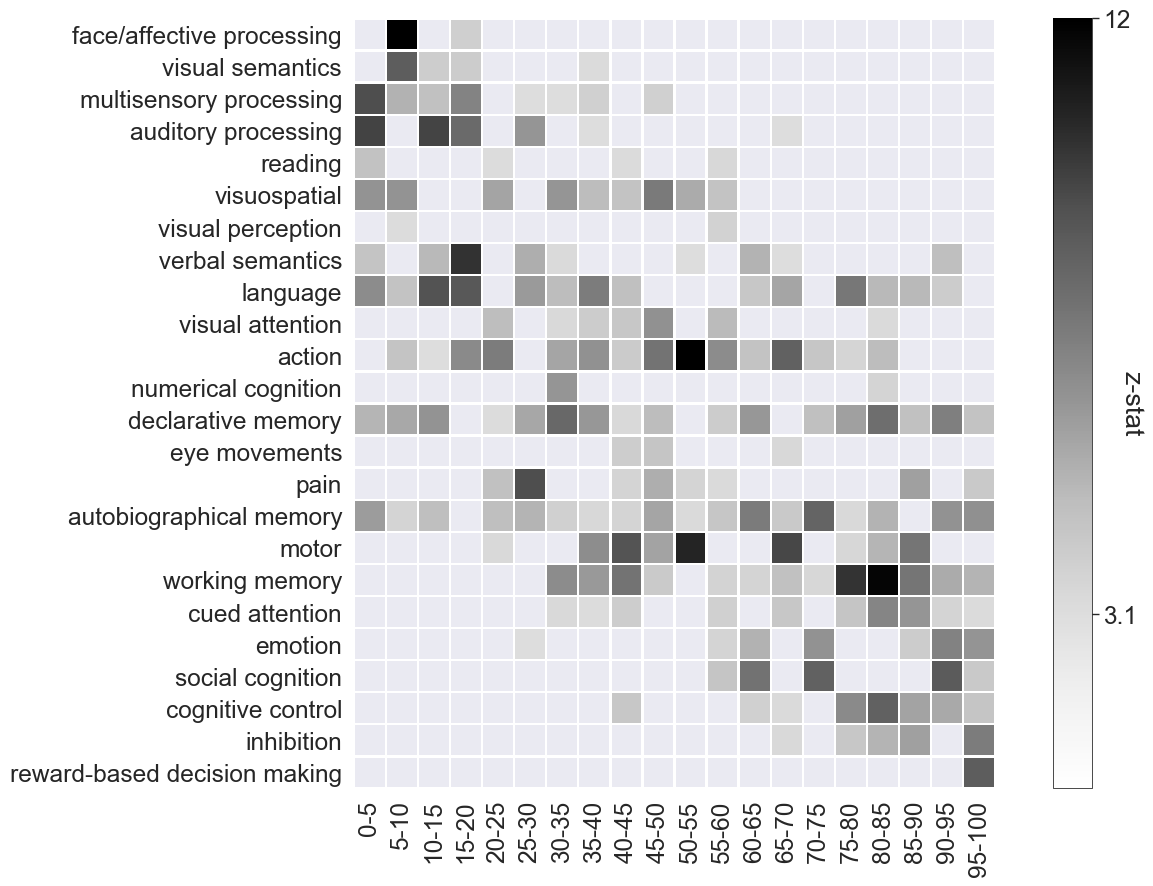

In [16]:
# Gradient 1

decoder = decode.Decoder(dataset, method='roi')

# Set threshold:
thr = 3.1
vmin = 5
vmax = 12

tot = 5
data = decoder.decode([str('E:/test/Bins_Resampled_2mm/SDI_bin%02d.nii' % (i)) 
                       for i in range(1,21)],save='decoding_results.txt')
#data = decoder.decode([str('../Margulies_paper_code/NeuroanatomyAndConnectivity-gradient_analysis-5b2ac63/gradient_data/masks/volume_%02d_%02d.nii.gz' % (i * tot, (i * tot) + tot)) 
                     #  for i in range(0,100/tot)], save='decoding_results_Margulies.txt')
df = []
df = data.copy()
newnames = []
[newnames.append(('%s-%s' % (str(i * tot), str((i*tot) + tot)))) for i in range(0,len(df.columns))]
df.columns = newnames
df[df<thr] = 0 
heatmapOrder = getOrder(np.array(df), thr)

sns.set(context="paper", font="sans-serif", font_scale=2)
f, (ax1) = plt.subplots(nrows=1,ncols=1,figsize=(15, 10), sharey=True)
plotData = df.reindex(df.index[heatmapOrder])
cax = sns.heatmap(plotData, linewidths=1, square=True, cmap='Greys', robust=False, 
            ax=ax1, vmin=0.5, vmax=vmax, mask=plotData == 0)
#sns.axlabel('Percentile along gradient', 'NeuroSynth topics terms')
cbar = cax.collections[0].colorbar
cbar.set_label('z-stat', rotation=270)
cbar.set_ticks(ticks=[thr,vmax])
cbar.set_ticklabels(ticklabels=[thr,vmax])
cbar.outline.set_edgecolor('black')
cbar.outline.set_linewidth(0.5)

plt.draw()
f.savefig('SDI_5_100.neurosynth.svg', format='svg')